In [6]:
import pyaudio
import wave
import sys
import os
import ctypes
import struct
import scipy.io.wavfile as wav
import numpy as np
from time import sleep
from collections import Counter
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile
%matplotlib inline

In [16]:
def get_wav_data(path, max_values):
    (rate, sig) = wav.read(path)
    amplitudes = map(lambda x: ctypes.c_ubyte(int(x)).value, sig)
    amplitudes = [struct.unpack("h", bytearray([a, b]))[0] for a, b in zip(amplitudes[:max_values:2], amplitudes[1:max_values:2])]
    return amplitudes


def plot_wav(path, normilize=True, plot_fft=True, max_values_get=-1, max_values_print=10000):
    data = get_wav_data(path, max_values_get)
    
    # notmilize ?
    if normilize:
        data = [(a / 2**16.) * 2 for a in data]
    
    # plt.plot(data[:max_values])
    # plt.show()
    
    if plot_fft:
        # fft
        spectrum = fft(data)
        spectrum = abs(spectrum[:len(spectrum) / 2])[1:max_values_print]

        # plot
        plt.plot(spectrum) 
        plt.title('Max value {0} on {1} Hz'.format(spectrum.max(), spectrum.argmax()))
        plt.show()

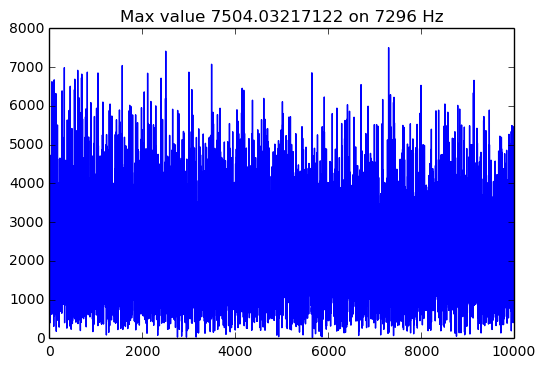

In [ ]:
directories = ['/home/kolegor/Code/VAS/data/wav_files/wav_other_voice/', '/home/kolegor/Code/VAS/data/wav_files/wav_my_voice/']

for directory in directories:
    for filename in os.listdir(directory):
        plot_wav(directory + filename)